Lasso avec Python

La régression Lasso, contrairement à Ridge, permet de réaliser une sélection de variables en mettant à zéro sélectivement les coefficients


Jeu de données de 16 features pour estimer le salaire des joueurs (LNSALARY est la variable cible), ou plus exactement le logarithme népérien de leur salaire (car la distribution est dissymétrique)

Nous utiliserons l’erreur quadratique moyenne (MSE : mean squared
error) pour mesurer les qualités prédictives des modèles.

In [12]:
# -*- coding: utf-8 -*-
#charger les données
import numpy as np
import matplotlib.pyplot as plt
import pandas
bb = pandas.read_excel("Baseball.xlsx",sheet_name=0)

In [6]:
#description
print(bb.shape)
print(bb.describe())

(337, 17)
           BatAVG      OnBase        Runs        Hits     Doubles     Triples  \
count  337.000000  337.000000  337.000000  337.000000  337.000000  337.000000   
mean     0.257825    0.323973   46.697329   92.833828   16.673591    2.338279   
std      0.039546    0.047132   29.020166   51.896322   10.452001    2.543336   
min      0.063000    0.063000    0.000000    1.000000    0.000000    0.000000   
25%      0.238000    0.297000   22.000000   51.000000    9.000000    0.000000   
50%      0.260000    0.323000   41.000000   91.000000   15.000000    2.000000   
75%      0.281000    0.354000   69.000000  136.000000   23.000000    3.000000   
max      0.457000    0.486000  133.000000  216.000000   49.000000   15.000000   

         HomeRuns         RBI       Walks  StrikeOuts  StolenBases  \
count  337.000000  337.000000  337.000000  337.000000   337.000000   
mean     9.097923   44.020772   35.017804   56.706231     8.246291   
std      9.289934   29.559406   24.842474   33.828

Distribution dissymétrique du salaire (skewed right)-> passage en LOG

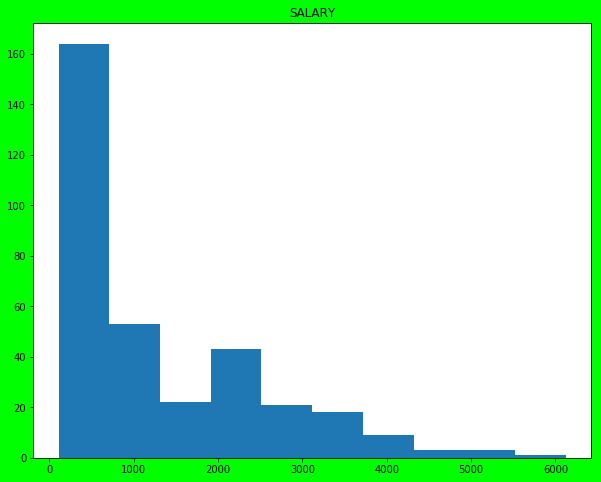

In [30]:
bb['SALARY']= np.exp(bb['LNSALARY'])

fig , ax =  plt.subplots(1,1,figsize=(10,8),facecolor = 'lime')
ax.hist(bb["SALARY"])
plt.title("SALARY")
plt.show()

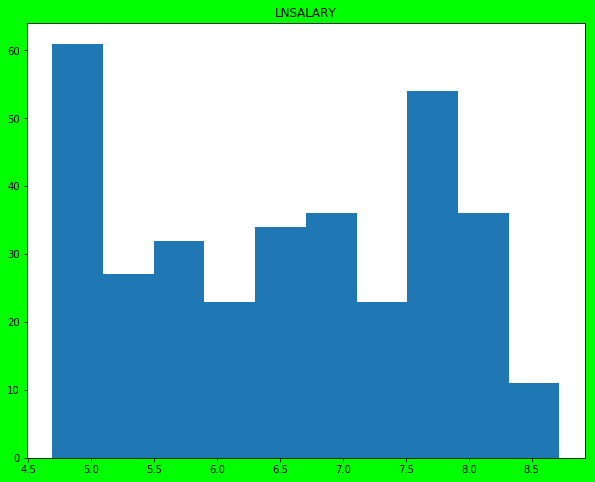

In [31]:
fig , ax =  plt.subplots(1,1,figsize=(10,8),facecolor = 'lime')
ax.hist(bb["LNSALARY"])
plt.title("LNSALARY")
plt.show()

In [36]:
bb.drop(['SALARY'], axis=1, inplace=True)

In [38]:
#subdivision
#Nous optons pour ntrain = 200 observations pour l’apprentissage, ntest = 137 pour l’évaluation
from sklearn.model_selection import train_test_split
bbTrain, bbTest = train_test_split(bb,train_size = 200,random_state=69780)


#vérifications
print(bbTrain.shape)
print(bbTest.shape)

(200, 17)
(137, 17)


C:\Users\n000187816\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Régression linéaire multiple avec statsmodel

In [42]:
#matrice des explicatives
XTrain = bbTrain.iloc[:,:16]
print(XTrain.shape)

#à laquelle est ajoutée la constante
import statsmodels.api as sm
X1Train = sm.add_constant(XTrain)

#vérification
print(X1Train.head())

(200, 16)
     const  BatAVG  OnBase  Runs  Hits  Doubles  Triples  HomeRuns  RBI  \
256    1.0   0.267   0.333    68   130       22        2        20   69   
72     1.0   0.211   0.274     5    12        2        0         0    3   
89     1.0   0.255   0.321    39   108       22        8         3   26   
66     1.0   0.285   0.331    84   170       28       10         8   54   
244    1.0   0.265   0.322    44   102       17        1         6   51   

     Walks  StrikeOuts  StolenBases  Errors  FreeAgElig  FreeAge91  ArbElig  \
256     45          77           32       4           0          0        1   
72       3           2            0       4           0          0        0   
89      42          61            2       8           0          0        1   
66      42          65           34       5           0          0        1   
244     33          56            3      18           1          1        0   

     Arb91  
256      0  
72       0  
89       0  
66       0  

In [44]:
#vecteur cible
yTrain = bbTrain.iloc[:,16]

#lancer la régression
reg = sm.OLS(yTrain,X1Train)
resReg = reg.fit()
#affichage
print(resReg.summary())

                            OLS Regression Results                            
Dep. Variable:               LNSALARY   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     45.38
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           6.05e-55
Time:                        18:57:52   Log-Likelihood:                -148.19
No. Observations:                 200   AIC:                             330.4
Df Residuals:                     183   BIC:                             386.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.4578      0.295     18.487      

Le R² = 0.799 (coefficient de détermination) : le modèle explique près de 80% de la
variabilité de la variable cible. Les 6 explicatives significatives à 5% (p-value < 0.05) dans le
modèle sont : Hits, Walks, StrikeOuts, FreeAgElig, FreeAge91 et ArbElig.

Remarque : A ce stade, nous devrions réaliser une sélection de variables (approche fondée
sur le F-partiel ou s’appuyant sur l’optimisation des critères AIC / BIC par exemple) avant de
procéder à la prédiction. Nous choisissons néanmoins de les conserver toutes dans ce tutoriel
pour simplifier la démarche

In [45]:
#matrice des descripteurs pour échantillon test
XTest = bbTest.iloc[:,:16]
X1Test = sm.add_constant(XTest)

#appliquer le modèle
ypReg = reg.predict(resReg.params,X1Test)
print(ypReg)

[5.29997323 6.84613232 7.55142788 5.22087383 5.26194944 7.15632082
 7.36727543 5.51548807 8.06390768 5.32165209 6.91716589 5.41398391
 6.93810482 5.83327327 7.85112012 5.31306496 7.12192876 5.59313443
 6.71741186 5.36641471 7.44937662 5.23380778 8.11776796 7.59218883
 6.70587705 5.29312511 7.6391306  5.32942865 5.23724942 7.90629044
 6.41704116 6.63647731 6.01574669 6.00362182 5.75163616 6.05905471
 5.24539717 4.97209752 5.23552981 7.569368   7.98912058 5.53956841
 7.88799593 7.97457327 7.1372244  6.98132255 7.15488267 7.99555784
 5.68073826 5.28952343 6.70988174 7.48177018 5.17415873 7.01767749
 5.15905243 5.25498815 5.22436309 7.43343467 7.76868848 6.88649216
 5.6415536  7.35174624 8.14955073 7.75458064 6.11058461 7.18777541
 6.06307365 5.16830624 7.0459883  5.99942753 6.04232058 5.15336918
 5.76306512 7.1262623  7.66533357 5.24463367 5.42459435 6.68340058
 5.41798834 8.19045115 7.25033081 7.31325132 5.96905192 5.28074053
 8.12502299 8.01427805 6.93544367 5.95219082 6.45009922 6.6504

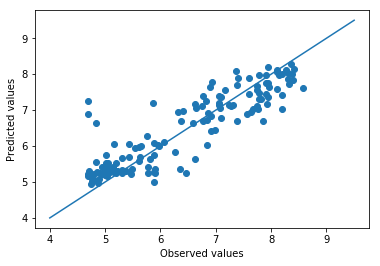

In [46]:
#y obs. sur l'échantillon test
yTest = bbTest.iloc[:,16]

#librairie numpy
import numpy

#graphique
import matplotlib.pyplot as plt
plt.scatter(yTest,ypReg)
plt.plot(numpy.arange(4,10,0.5),numpy.arange(4,10,0.5))
plt.xlabel("Observed values")
plt.ylabel("Predicted values")
plt.show()

Les points devraient se situer tout au long de la diagonale principale lorsque les prédictions
sont parfaites. Dans notre cas (Figure 1), la régression est relativement bonne. Le R²=0.799
obtenu ci-dessus le laissait augurer. On note néanmoins que certains points sont très mal
modélisés, ils sont très loin de la diagonale.

In [47]:
#mesurer le MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(yTest,ypReg))

0.33521309587415726


Régression Lasso

Il est préférable de centrer et réduire les variables dans la régression régularisée afin que le
coefficient de pénalité α (noté λ) agisse de manière homogène
sur l’ensemble des coefficients de la régression

In [48]:
#centrer et réduire les données d'apprentissage
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ZTrain =sc.fit_transform(bbTrain)

In [56]:
#moyennes des variables
print(sc.mean_)

[2.56955e-01 3.24015e-01 4.69900e+01 9.20400e+01 1.63800e+01 2.32500e+00
 8.92000e+00 4.32900e+01 3.54800e+01 5.47500e+01 8.51500e+00 6.59000e+00
 4.35000e-01 1.45000e-01 1.95000e-01 1.50000e-02 6.60085e+00]


In [57]:
#variance des variables
print(sc.var_)

[1.90247298e-03 2.69822477e-03 8.90979900e+02 2.88477840e+03
 1.11605600e+02 6.37937500e+00 7.89936000e+01 8.65915900e+02
 6.70629600e+02 1.07084750e+03 1.52309775e+02 3.59419000e+01
 2.45775000e-01 1.23975000e-01 1.56975000e-01 1.47750000e-02
 1.28024478e+00]


In [58]:
#affichage des moyennes après transformations
#Les moyennes des variables transformées sont bien nulles (aux erreurs de troncature près) :
print(numpy.mean(ZTrain,axis=0))

[-9.72555370e-16  3.10862447e-17 -6.21724894e-17 -8.88178420e-17
  1.06581410e-16 -9.99200722e-17 -4.44089210e-18  5.32907052e-17
  1.24344979e-16 -1.77635684e-17 -8.88178420e-18 -4.44089210e-18
 -2.66453526e-17  1.02140518e-16  4.44089210e-18 -2.22044605e-18
 -2.39808173e-16]


In [59]:
#affichage des variances itou
# variances égales à 1
print(numpy.var(ZTrain,axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [61]:
#Nous pouvons lancer la régression Lasso de la librairie « scikit-learn ». Nous précisons que la
#constante n’est pas nécessaire puisque toutes les variables sont centrées, et qu’il n’est pas
#utile de les normaliser puisqu’elles ont été standardisées en amont. Les autres paramètres
#sont laissés pas défaut

#régression Lasso, paramètres par défaut (alpha  = 1.0)
from sklearn.linear_model import Lasso
regLasso1 = Lasso(fit_intercept=False,normalize=False)
print(regLasso1)

Lasso(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


nous verrons par la suite le réajustement de l'alpha

In [62]:
#apprentissage
regLasso1.fit(ZTrain[:,:16],ZTrain[:,16])

#les coefficients
print(regLasso1.coef_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Ils sont tous nuls. Difficile de réaliser une prédiction performante avec ça. Manifestement, la
valeur (α = 1.0) ne convient pas

Comment peut-on faire pour déterminer une valeur de α qui convient ?

Lorsque α est trop élevé, tous les coefficients de la régression sont nuls, nous en avons une
illustration ici ; lorsque α est trop faible, proche de 0, nous obtenons les coefficients de la
régression linéaire multiple usuelle

In [69]:
#lasso path (valeurs de alpha à tester)
my_alphas = numpy.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0])

#La fonction lasso_path() permet de produire les coefficients estimés correspondants :
#obtention des valeurs des coefs. corresp.
from sklearn.linear_model import lasso_path
alpha_for_path, coefs_lasso, _ = lasso_path(ZTrain[:,:16],ZTrain[:,16],alphas=my_alphas)

In [66]:
#dim. matrice des coefficients
print(coefs_lasso.shape)

(16, 10)


In [67]:
#alpha utilisés
print(alpha_for_path)

[1.    0.8   0.5   0.25  0.1   0.05  0.025 0.02  0.01  0.001]


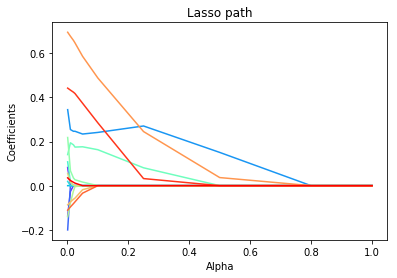

In [71]:
#jeu de couleurs pour faire joli
import matplotlib.cm as cm
couleurs = cm.rainbow(numpy.linspace(0,1,16))

#graphique lasso path (une courbe par variable)
for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_for_path,coefs_lasso[i,:],c=couleurs[i])
    
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()

Pour α = 1.0, tous les coefficients sont nuls effectivement. Pour α = 0.6, deux des coefficients
sont non-nuls, ce qui correspond à un scénario où deux seules explicatives sont actives dans
la régression. Etc.


In [75]:
#nombre de coefs. non-nuls pour chaque alpha
nbNonZero = numpy.apply_along_axis(func1d=numpy.count_nonzero,arr=coefs_lasso,axis=0)

#affichage miexu roganisé alpha vs. nombre de coefs non-nuls 
print(pandas.DataFrame({'alpha':alpha_for_path,'Nb non-zero coefs':nbNonZero}))

   alpha  Nb non-zero coefs
0  1.000                  0
1  0.800                  0
2  0.500                  2
3  0.250                  4
4  0.100                  4
5  0.050                  7
6  0.025                  9
7  0.020                 10
8  0.010                 12
9  0.001                 16


Ce tableau est plus engageant sous une forme graphique.

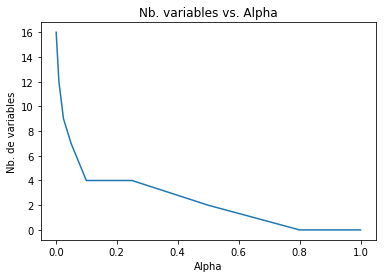

In [76]:
#ou sous forme graphique
plt.plot(alpha_for_path,nbNonZero)
plt.xlabel('Alpha')
plt.ylabel('Nb. de variables')
plt.title('Nb. variables vs. Alpha')
plt.show()

In [72]:
#nom des variables
nom_var = bb.columns[:16]

#coefficients pour alpha=0.25 (colonne n°3)
coefs25 = coefs_lasso[:,3]

#affichage des coefficients  pour alpha = 0.25
print(pandas.DataFrame({'Variables':nom_var,'Coefficients':coefs25}))

      Variables  Coefficients
0        BatAVG      0.000000
1        OnBase      0.000000
2          Runs      0.000000
3          Hits      0.270675
4       Doubles      0.000000
5       Triples      0.000000
6      HomeRuns      0.000000
7           RBI      0.081050
8         Walks      0.000000
9    StrikeOuts      0.000000
10  StolenBases      0.000000
11       Errors      0.000000
12   FreeAgElig      0.245411
13    FreeAge91      0.000000
14      ArbElig      0.032138
15        Arb91      0.000000


pour 4 variables -- alpha = 0,25 -- Il s’agit de Hits, RBI, FreeAgElig et ArbElig.

Validation croisée

Nous disposons de scénarios de solutions pour différentes versions de α. Mais nous ne savons
pas laquelle est la plus performante en prédiction. Dans cette section, nous utilisons la
validation croisée LassoCV() pour l’identifier.


In [80]:
#validation croisée pour Lasso
from sklearn.linear_model import LassoCV

#outil pour la détection de la solution la plus performante en validation croisée
lcv = LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,random_state=0,cv=5)
    
#lancement sur l'échantillon d'apprentissage
lcv.fit(ZTrain[:,:16],ZTrain[:,16])    

#valeurs des alphas qui ont été testés
print(lcv.alphas_)

#valeurs des MSE en validation croisée
print(lcv.mse_path_)

[1.    0.8   0.5   0.25  0.1   0.05  0.025 0.02  0.01  0.001]
[[0.93649681 0.8999204  1.10600324 1.0127433  1.04483625]
 [0.93649681 0.8999204  1.10600324 1.0127433  1.04483625]
 [0.74836709 0.6781293  0.88481882 0.83005599 0.83769334]
 [0.49603196 0.33392406 0.54118262 0.42756911 0.5835088 ]
 [0.2454802  0.22685436 0.29207343 0.22519332 0.41121256]
 [0.19487357 0.22261075 0.25240979 0.19031063 0.376714  ]
 [0.16429895 0.2193215  0.24264611 0.1854277  0.35736191]
 [0.15917131 0.22139796 0.24283309 0.18591439 0.35482339]
 [0.14588651 0.22529395 0.24602707 0.1881818  0.3489667 ]
 [0.13990895 0.23184779 0.25638676 0.2047393  0.34858521]]


La propriété mse_path_ est une matrice (10 x 5) : 10 parce que 10 versions de α ont été
testées ; 5 parce que nous avons demandé une 5-fold validation croisée

Nous calculons la moyenne pour disposer d’une mesure de performance synthétique pour
chaque scénario. Puis nous affichons le tableau mettant en relation α et le MSE (moyen) en
validation croisée

In [81]:
#moyenne mse en validation croisée pour chaque alpha
avg_mse = numpy.mean(lcv.mse_path_,axis=1)

#alphas vs. MSE en cross-validation
print(pandas.DataFrame({'alpha':lcv.alphas_,'MSE':avg_mse}))

   alpha       MSE
0  1.000  1.000000
1  0.800  1.000000
2  0.500  0.795813
3  0.250  0.476443
4  0.100  0.280163
5  0.050  0.247384
6  0.025  0.233811
7  0.020  0.232828
8  0.010  0.230871
9  0.001  0.236294


Que nous pouvons également exprimer sous forme graphique :

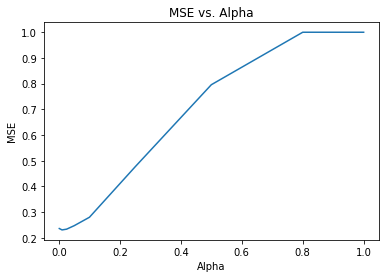

In [82]:
#sous-forme graphique
plt.plot(lcv.alphas_,avg_mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()

In [84]:
#best alpha
print(lcv.alpha_)

0.01


α = 0.01 est la solution qui minimise le MSE (0.230871), elle est composée de 12 variables
explicatives c.-à-d. 12 coefficients sont différents de zéro dans le modèle

Pour appliquer le modèle optimal (α = 0.01), nous devons tout d’abord centrer et réduire les
variables explicatives de l’échantillon test en utilisant les paramètres (moyennes, écarts-type)
calculés sur l’échantillon d’apprentissage

C’est ce que fait la fonction transform() de l’objet StandardScaler

In [87]:
#transformation des variables des données test
ZTest = sc.transform(bbTest)

In [88]:
#prediction avec ce modèle
ypzLasso = lcv.predict(ZTest[:,:16])

In [86]:
#dé-standardization de la prédiction
ypLasso = ypzLasso*numpy.sqrt(sc.var_[-1]) + sc.mean_[-1]

#performances en prédiction
print(mean_squared_error(yTest,ypLasso))

0.31204589721406967


Nous obtenons une MSE = 0.31204589721406967. Très légèrement moindre (plus la MSE est faible, meilleur est le modèle) qu’avec la régression usuelle avec « statsmodels »

pour rappel : 0.33 avec le modele OLS

http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Regression_Lasso_Python.pdf